In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose



from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

from statsmodels.tsa.statespace.sarimax import SARIMAX



from pmdarima import auto_arima


from statsmodels.tools.eval_measures import rmse

In [99]:
#df = pd.read_csv("MHclean.csv",index_col=0,parse_dates=True)
df = pd.read_csv("MHclean.csv")

In [100]:
df.head()

,date,MFG,Year,Month,Order SC Value,Order SC Count,Stock Order Value,Stock Order Count,Total Order Value,Total Order Count,...,Site-Healthcare,Site-Higher Education,"Site-Office,School,Commercial",Site-Other,Site-Retail,Traffic Signal,Utility,Veterinarian,Warehouse,Water-Sewer
0,2009-01-30,3GLTG,2009,1,0.0,0,0.0,0,595.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009-02-28,3GLTG,2009,2,0.0,0,0.0,0,6012.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009-03-30,3GLTG,2009,3,0.0,0,0.0,0,1380.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009-04-30,3GLTG,2009,4,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009-05-30,3GLTG,2009,5,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
df_OSC = df[["date","Order SC Value"]]

In [102]:
df_groupby = df_OSC.groupby(by = "date")["Order SC Value"].mean()

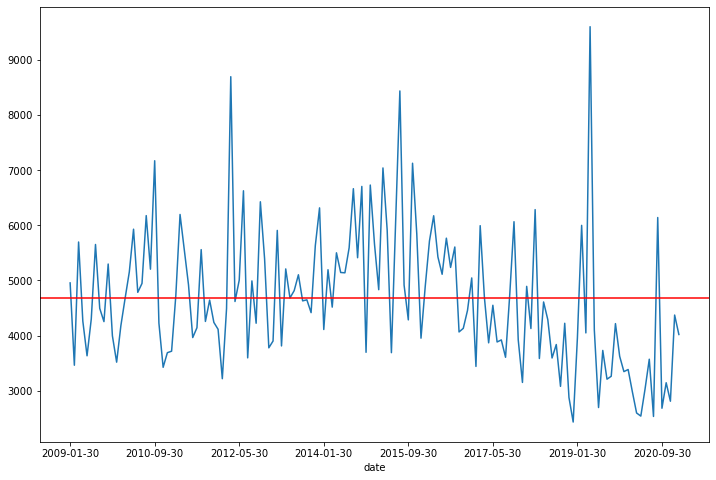

In [103]:
df_groupby.plot();
plt.axhline(float(df_groupby.mean()),color = 'red');

In [104]:
df2 = df_groupby

In [105]:
df2.head()

date
2009-01-30    4955.052292
2009-02-28    3461.318333
2009-03-30    5697.582188
2009-04-30    4262.048125
2009-05-30    3632.480990
Name: Order SC Value, dtype: float64

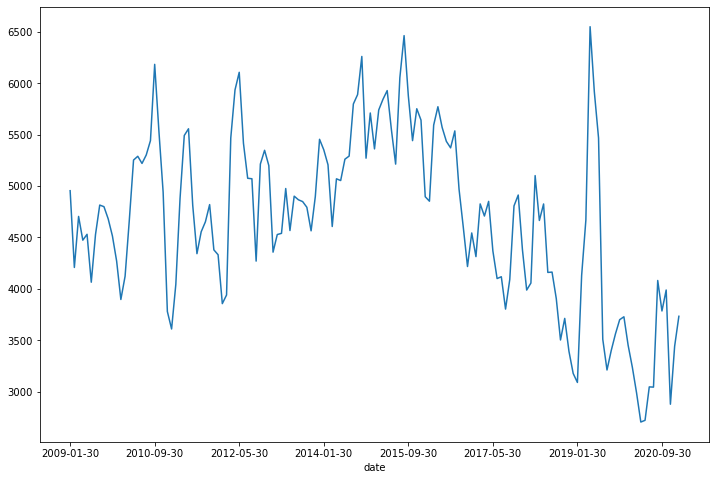

In [106]:
df2.rolling(window = 3, min_periods = 1).mean().plot();

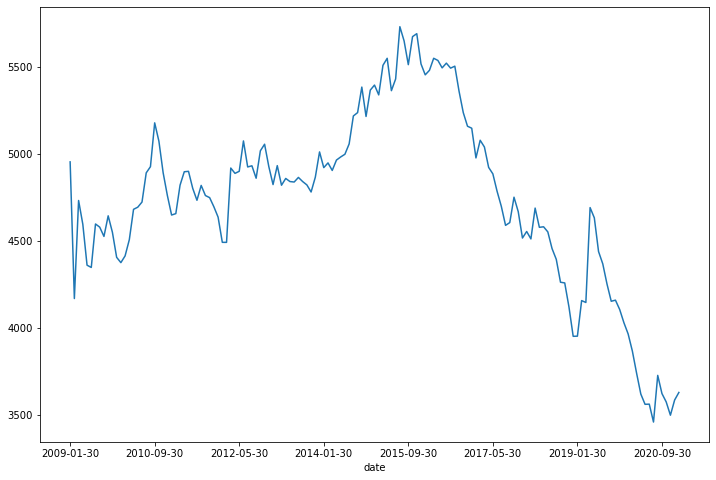

In [107]:
df2.ewm(alpha = 0.1, min_periods = 1).mean().plot();

In [108]:
df_train = df2[:116]  

In [109]:
df_test = df2[116:]

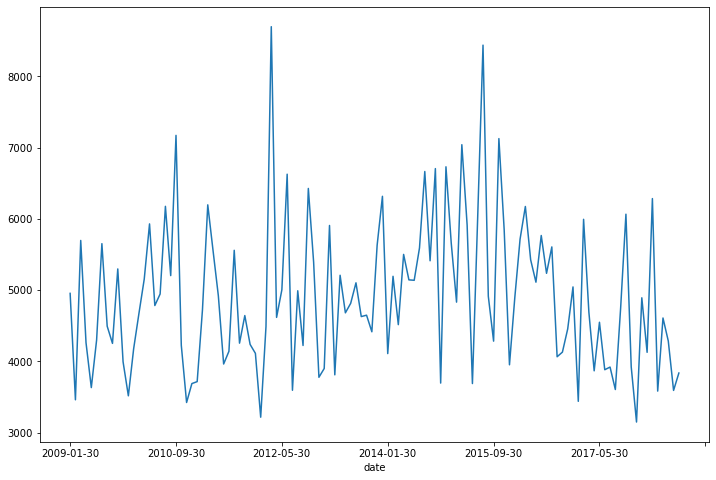

In [110]:
df_train.plot();

In [111]:
adfuller(df_train,autolag='AIC')[1] #p < 0.05, so it is safe to assume there is no overall trend

3.525221992016073e-17

In [112]:
adfuller(df2,autolag='AIC')[1] #p < 0.05, so it is safe to assume there is no overall trend

0.0001607640601502552

In [114]:
model = ARIMA(df_train,order=(1,0,0)).fit()

In [115]:
pred_model = model.predict(start=len(df_train),end=len(df_train)+len(df_test)-1,typ='levels').rename('pred')

In [116]:
rmse(df_test,pred_model)

1850.2537091716438

In [117]:
df2.describe()

count     145.000000
mean     4677.710393
std      1240.496808
min      2430.418698
25%      3836.960104
50%      4515.947396
75%      5426.319323
max      9605.453333
Name: Order SC Value, dtype: float64